In [1]:
# import depencencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# import depencencies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
database_path = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")

In [5]:
 # Declare a Base using `automap_base()`
Base = automap_base()

In [6]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
# designate Station Class
Station = Base.classes.station

In [9]:
# designate Measurment Class
Measurement = Base.classes.measurement

In [10]:
# create session
session = Session(engine)

In [11]:
# reflect Station database info
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc93c424340>,
 'id': 1,
 'latitude': 21.2716,
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397'}

In [12]:
# reflect Measurment database info
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc93c424370>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0}

In [13]:
# view how many rows in Station Database 
empt_list = []
counter = 0
for row in session.query(Station.station).all():
    empt_list.append(counter)
    counter +=1
len(empt_list)

9

In [14]:
# view how many rows in Measurement Database 
empt_list = []
counter = 0
for row in session.query(Measurement.date).all():
    empt_list.append(counter)
    counter +=1
len(empt_list)

19550

In [15]:
# find the latest date in the database
date_end = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
date_end

'2017-08-23'

In [16]:
#assign last date to DT
date_end = dt.date(2017, 8, 23)
print(date_end)

2017-08-23


In [17]:
# assign one year before end date to DT
date_begin = date_end - dt.timedelta(days=365)
print(date_begin)

2016-08-23


In [18]:
# query measurement database for precip data within this 1 year time span
session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= date_begin).\
    filter(Measurement.date <= date_end).all()

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [19]:
# assign query to a variable
precip_query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= date_begin).\
    filter(Measurement.date <= date_end).all()

In [20]:
# create database from query
precip_df=pd.DataFrame(precip_query)
precip_df=precip_df.set_index('date')

In [21]:
# sort DF by date as index
precip_df = precip_df.sort_values(by=['date'])
precip_df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [22]:
# rename prcp column for clarity
precip_df = precip_df.rename(columns={"prcp": "Precipitation"})
precip_df 

,Precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


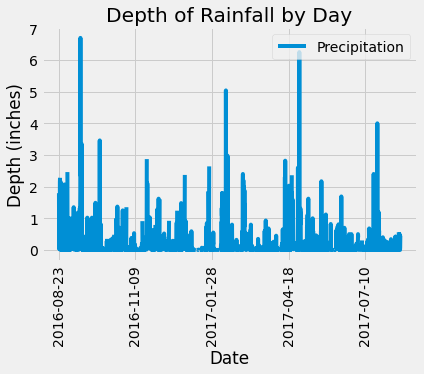

In [23]:
# create depth of rainfall by day plotg
precip_df.plot()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Depth (inches)')
plt.title('Depth of Rainfall by Day')
plt.legend(loc='upper right')
plt.show()

In [24]:
# generate summary stats
summary_stats = precip_df.describe()
summary_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
# determine number of stations
station_total = len(session.query(Station.station).all())
station_total

9

In [26]:
# display station ids
station_ids = session.query(Station.station, Station.id).all()
station_ids

[('USC00519397', 1),
 ('USC00513117', 2),
 ('USC00514830', 3),
 ('USC00517948', 4),
 ('USC00518838', 5),
 ('USC00519523', 6),
 ('USC00519281', 7),
 ('USC00511918', 8),
 ('USC00516128', 9)]

In [27]:
# display stats of activity of station, use func.count and group by station, 
sel = [Station.id, Measurement.station, func.count(Measurement.prcp)]
session.query(*sel).filter(Station.station == Measurement.station).group_by(Measurement.station).all()

[(8, 'USC00511918', 1932),
 (2, 'USC00513117', 2696),
 (3, 'USC00514830', 1937),
 (9, 'USC00516128', 2484),
 (4, 'USC00517948', 683),
 (5, 'USC00518838', 342),
 (7, 'USC00519281', 2772),
 (1, 'USC00519397', 2685),
 (6, 'USC00519523', 2572)]

In [28]:
# sort most active station id by amount of prcp counts determined
sel = [Station.id, Measurement.station, func.count(Measurement.prcp)]
session.query(*sel).filter(Station.station == Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[(7, 'USC00519281', 2772),
 (1, 'USC00519397', 2685),
 (2, 'USC00513117', 2696),
 (6, 'USC00519523', 2572),
 (9, 'USC00516128', 2484),
 (3, 'USC00514830', 1937),
 (8, 'USC00511918', 1932),
 (4, 'USC00517948', 683),
 (5, 'USC00518838', 342)]

In [29]:
# ddisplay most active station id
most_active_station = session.query(*sel).filter(Station.station == Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active_station[0]

7

In [30]:
# display stats of most active station id
most_active_stats = session.query(Station.id, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Station.id == most_active_station[0]).all()
most_active_stats

[(7, 54.0, 85.0, 71.66378066378067)]

In [31]:
# display stats of most active station
print(f'Station ID #{most_active_stats[0][0]} had a min temp of {most_active_stats[0][1]} degrees, a max temp of {most_active_stats[0][2]} degrees, and an average temp of {round(most_active_stats[0][3],2)} degrees.')

Station ID #7 had a min temp of 54.0 degrees, a max temp of 85.0 degrees, and an average temp of 71.66 degrees.


In [32]:
# design query for temperatures for most active station over most recent year
temp_query = session.query(Measurement.date, Measurement.tobs).\
    filter(Station.station == Measurement.station).\
    filter(Station.id == most_active_station[0]).\
    filter(Measurement.date >= date_begin).\
    filter(Measurement.date <= date_end).all()
temp_query

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [33]:
# create DF from query
temp_df = pd.DataFrame(temp_query)
temp_df

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


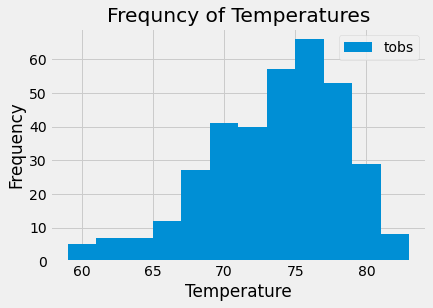

In [34]:
# plot histogram of temperatures
temp_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Frequncy of Temperatures')
plt.legend(loc='upper right')
plt.show()

# Close session

In [35]:
# Close Session
session.close()